# Dataset Description

**Source :**

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption



**Data Set Information:**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.



**Attribute Information:**

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a  dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Importing some common Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import warnings
from sklearn.metrics import mean_squared_error

### Loading Dataset using pandas Package

In [2]:
Data = pd.read_csv("C:\\Users\\SS\\Downloads\\MDS Course files\\Data set\\household_power_consumption\\household_power_consumption.txt",sep=';')

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset set is in txt format and also it separated by ';'. So, we used sep argument to make correct dataframe / tabel

In [4]:
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
Data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0
2075258,26/11/2010,21:02:00,0.932,0,239.55,3.8,0,0,0.0


## Checking Data Structure
-> Number of rows / instaces / enteries

-> Number of columns / features / attributes

In [5]:
print(f"Number of rows are {Data.shape[0]}. \nNumber of Columns are {Data.shape[1]}.")

Number of rows are 2075259. 
Number of Columns are 9.


## From the Head & Tail of the Dataset, we can see starting/minimum datestamp is '16-12-2006' & last/maximum datestamp is '26-11-2010'. This means this Data set is of 3 years 11 months 11 days. But the total number of obervation/instances are more than 20 Lakh/2 million which means data is recorded or given hourwise.

## We can forecast House Voltage on many level like hour level, day level, week level, month level, year level from the given data.

# -> let say Family whose house's readings are recorded want to estimate there montly electricity bill on the basis of power they used in a month. So according to this we try to Forcast Voltage of the house on montly level.

## Information about columns

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Clearly from this we can see there are many features which are numbers in real but categorised as object.

So, we will change their types.

In [10]:
Data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

To change the types of the columns, First we seprate Date, Time and Other Features then we **use apply function and .to_numeric function**

In [11]:
temp1 = Data[['Date', 'Time']]
temp1.head(2)

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00


In [12]:
temp1[['Date']] = temp1[['Date']].apply(pd.to_datetime)
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Time    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 31.7+ MB


C:\Users\SS\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
temp1.head()

,Date,Time
0,2006-12-16,17:24:00
1,2006-12-16,17:25:00
2,2006-12-16,17:26:00
3,2006-12-16,17:27:00
4,2006-12-16,17:28:00


In [14]:
temp2 = Data[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
              'Sub_metering_3']]
temp2.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [15]:
temp2 = temp2.apply(pd.to_numeric, errors='coerce')
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


In [16]:
Data = pd.concat([temp1,temp2],axis=1)
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Now Data is ready with correct feature types

# Checking Missing Values

In [17]:
Data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are equal number of instances .i.e., 25979 which are empty in our Data. which means 25979 rows of the datasets are completely empty.

Let's check this!

In [18]:
# creating bool series True for NaN values 
bool_series = pd.isnull(Data["Voltage"])  
    
# filtering data  
# displaying data only with Voltage = NaN  
Data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,2010-09-28,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,2010-09-28,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,2010-09-28,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we fill these rows using **interpolate function** using linear method.

In [19]:
Data = Data.interpolate(method ='linear') 

Checking again if there left any null values. 

In [20]:
Data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Missing Values are handled

# Reseting Index
We reset 'Date' as index

In [21]:
Data.set_index('Date',inplace=True)
Data.head(4)

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0


# Resampling Data on Monthly Level

In [22]:
Model_Dataset = Data['Voltage'].resample('M').mean()

In [30]:
Model_Dataset = Model_Dataset.to_frame()

In [31]:
Model_Dataset.head()

,Voltage
Date,
2006-12-31,241.440787
2007-01-31,240.145796
2007-02-28,239.871107
2007-03-31,239.948532
2007-04-30,238.373893


In [32]:
print(f"Number of rows are {Model_Dataset.shape[0]}. \nNumber of Columns are {Model_Dataset.shape[1]}.")

Number of rows are 49. 
Number of Columns are 1.


# Visualization

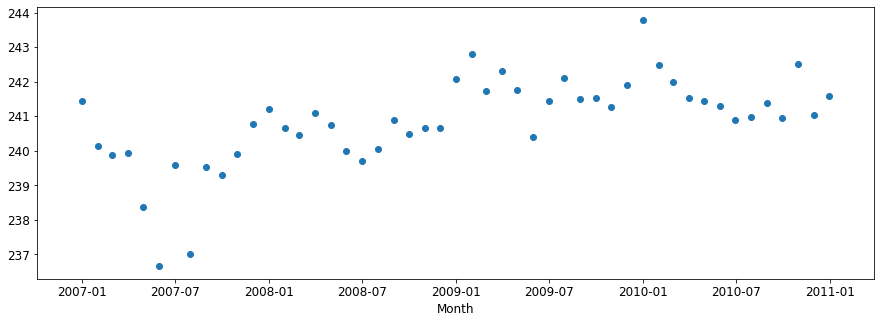

In [79]:
plt.figure(figsize=(15,5))
plt.scatter(Model_Dataset.index,Model_Dataset['Voltage'])
plt.tick_params(labelsize=12)
plt.xlabel('Month',fontsize=12)
plt.show()

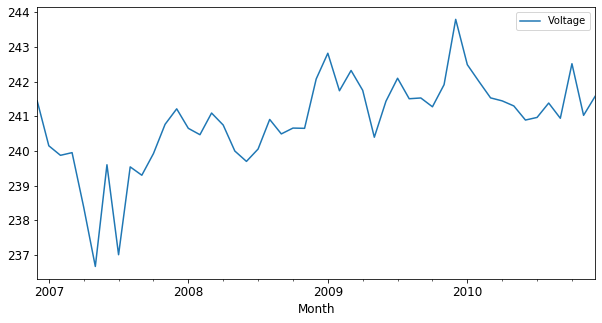

In [77]:
Model_Dataset.plot(figsize=[10,5],fontsize=12)
plt.legend(fontsize=10)
plt.xlabel('Month',fontsize=12)
plt.show()

### Voltage is slowly increasing year wise. So it show there is some trend in this Data

# Decomposing of Data

### Importing module for decomposition

In [44]:
import statsmodels.api as sm

Reviewing the plot, it suggests that there is some seasonality, but the **amplitude (height) of the cycles does not appears to be increasing** or **seasonal variation is relatively constant over time**, suggesting that it is **Additive Model**.

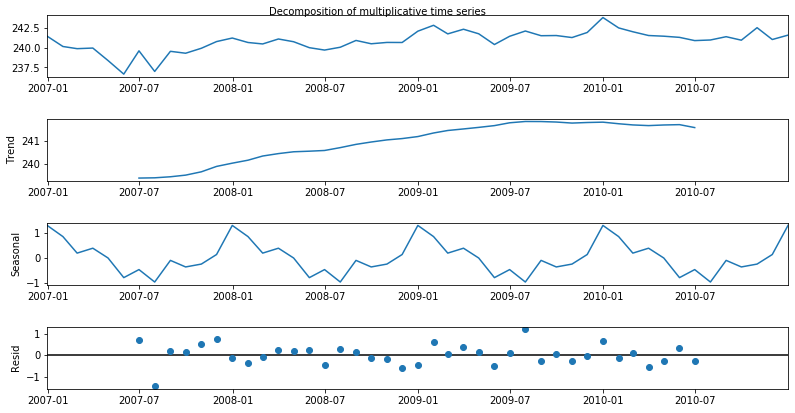

In [82]:
timeseries = Model_Dataset

# Decomposition of Additive time series
decomposition = sm.tsa.seasonal_decompose(timeseries, model='additive')

# Visualisation
grp = decomposition.plot()
grp.suptitle('Decomposition of multiplicative time series',fontsize=10)
grp.set_figwidth(12)
grp.set_figheight(6)

plt.show()

**The following are some of our key observations from this analysis:**

1) Trend: clearly it is not a straight line. It is constantly increasing.

2) Seasonality: as discussed, seasonal plot displays a fairly consistent month-on-month or year-on-year pattern. The yearly seasonal components are average values for a year after removal of trend.

3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components.

The expectations from remainder component are that it should look like white noise a periodic pattern.

# Data Stationary Test

### Data vs Rolling mean Plot

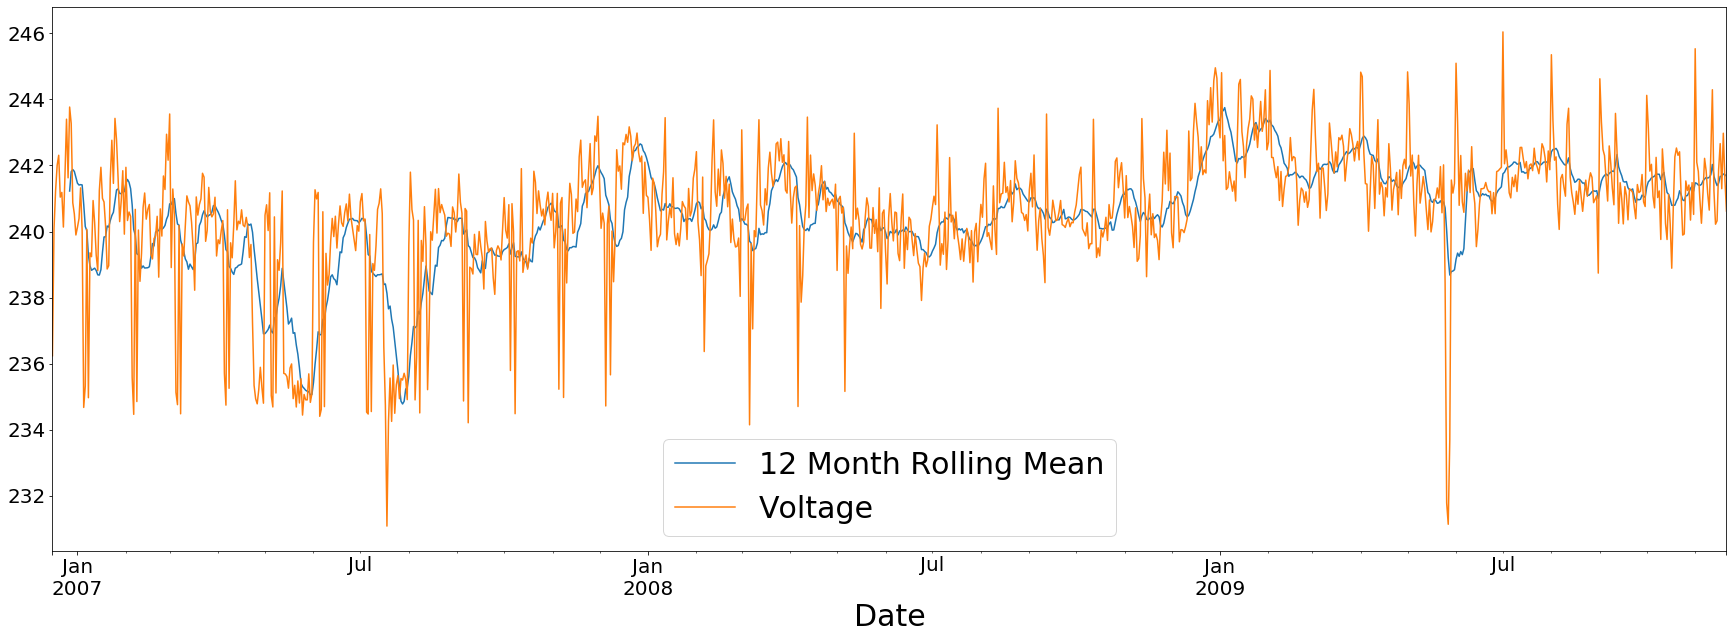

In [32]:
plt.figure(figsize=(30,10))
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot(fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()

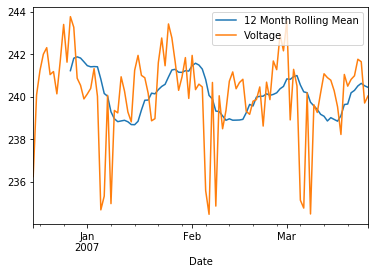

In [33]:
##### Time series plot for smaller data for better understanding
timeseries2.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries2.plot()
plt.legend()
plt.show()

# Dickey-Fuller Test
This test is to check if Data is stationary or not.

### Importing adfuller function from stats tools module

In [34]:
from statsmodels.tsa.stattools import adfuller

**Defining DF_Test function** to check state of Data

In [35]:
def DF_Test(time_series):
    result=adfuller(time_series)
    
    print(f"Result of Dickey-Fuller test: \n{result}")
    print()
    print('Augmented Dickey Fuller test:--')
    
    labels=['ADF Test Statistics','p-value','#Lags used','Number of Observation used']
    
    for value,label in zip(result,labels):
        print(f'{label} : {str(value)}')
        
    if result[1]<=0.05:
        print("\nConclusion:\nStrong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("\nConclusion:\nWeak evidence against the null hypothesis, accept the null hypothesis. Data is not stationary")


In [36]:
Data['Voltage Difference'] = Data['Voltage']- Data['Voltage'].shift(1)

# Dropping NA values and Calling function
DF_Test(Data['Voltage Difference'].dropna())

Result of Dickey-Fuller test: 
(-11.605519440283159, 2.586797255444516e-21, 24, 1416, {'1%': -3.434976549531161, '5%': -2.86358329808087, '10%': -2.5678578416363433}, 5112.555759909105)

Augmented Dickey Fuller test:--
ADF Test Statistics : -11.605519440283159
p-value : 2.586797255444516e-21
#Lags used : 24
Number of Observation used : 1416

Conclusion:
Strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


## Finally Data is Stationary. Now we can apply ARIMA Model on Data

### ARIMA is a combination of 3 parts and it has 3 parameters i.e. **p, d, q**
1. AutoRegressive (AR) – extract the influence of the previous periods values on the current period.
   **p** is the parameter associated with the auto-regressive aspect of the model, which incorporates past values.
   
2. Integrated (I) – Subtract time series from its lagged series to extract trends from the data. 
    **d** is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
    
3. Moving Average (MA) – extract the influence of the previous period’s error terms on the current period’s error.
    **q** is the parameter associated with the moving average part of the model.

# 1. AutoRegessive 

Import pacf from statsmodels package

In [37]:
from statsmodels.tsa.stattools import pacf

Text(0.5, 1.0, 'Partial Autocorrelation Function')

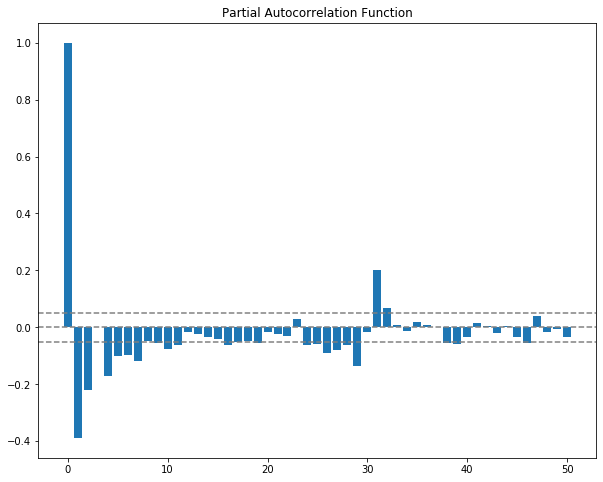

In [38]:
AR_pacf = pacf(Data[['Voltage Difference']][1:] , nlags=50)

plt.figure(figsize=(10,8))
lags = np.array([i for i in range(51)])

#Plot PACF: 
plt.bar(lags, AR_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data[['Voltage Difference']][1:])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data[['Voltage Difference']][1:])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

### Another way to plot Auto Correlation

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf 

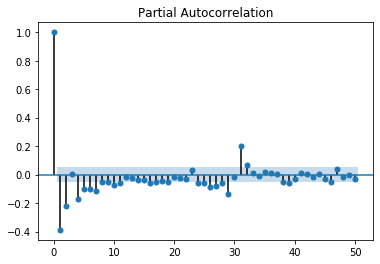

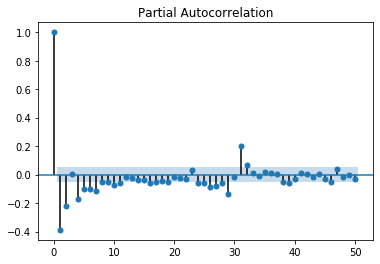

In [40]:
plot_pacf(Data[['Voltage Difference']][1:] ,lags=50)

## From Partial AutoCorrelation plot, we can see the confidence limit is small but there are 4 scuccessive spikes/bars are above confidence level.
So, for first our value of p = 4.

# 2. Integrated

### From the above we removed the trend from data by shifting it by 1. So, value of d = 1.

# 3. Moving Average

In [41]:
# Importing acf (partial autocorrelation function) from statsmodels package
from statsmodels.tsa.stattools import acf

C:\Users\SS\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function')

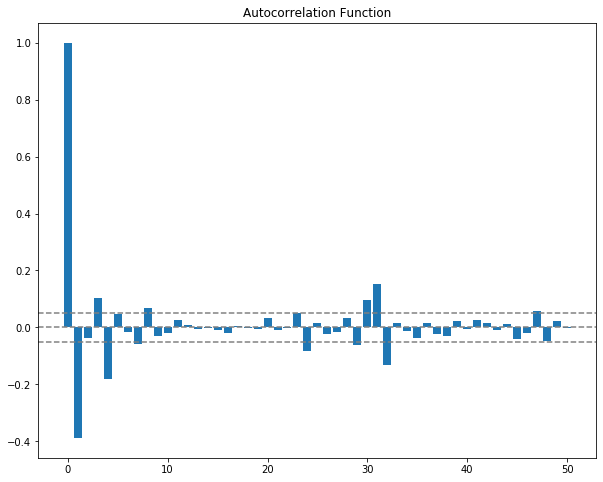

In [42]:
AR_acf = acf(Data[['Voltage Difference']][1:] , nlags=50)

plt.figure(figsize=(10,8))
lags = np.array([i for i in range(51)])
#Plot ACF: 
plt.bar(lags, AR_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data[['Voltage Difference']][1:])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data[['Voltage Difference']][1:])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

### 2nd way to plot 

In [43]:
from statsmodels.graphics.tsaplots import plot_acf 

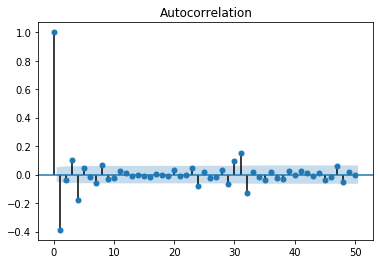

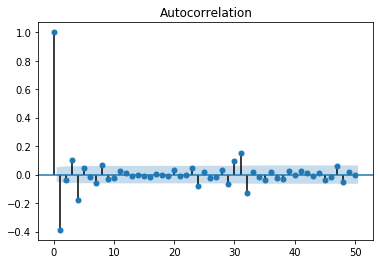

In [44]:
plot_acf(Data[['Voltage Difference']][1:] ,lags=50)

## From Auto Correlation plot, the confidence limit are quiet small and only 2 scuccessive spikes are above confidence level.
So, for first our value of q = 2.

# -> ARIMA Model
Now we use ARIMA Modeling to create a model to forcast the Voltage.

### Import ARIMA from statsmodels Package.

In [45]:
from statsmodels.tsa.arima_model import ARIMA

Making Forcast_Model of the order ( p=4, d=1, q=2)

In [48]:
Forcast_Model = ARIMA(train_data , order = (4,1,2))

fit Forcast_Model

In [49]:
Forcast_Model_fit = Forcast_Model.fit()

In [50]:
Pred_value = Forcast_Model_fit.forecast(steps=370)[0]  # the number of out of sample forecasts from the end of the sample

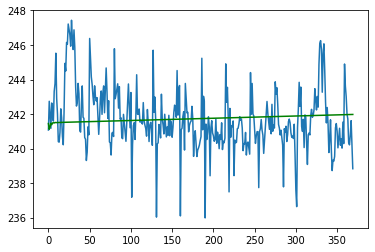

In [51]:
plt.plot(test_data)
plt.plot(Pred_value,color='g')

In [52]:
import itertools
p = d = q = range(5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [53]:
import warnings
warnings.filterwarnings('ignore')
aic_list=[]

In [54]:
for params in pdq:
    try:
        arima_model=ARIMA(train_data,order=params)
        arima_model_fit=arima_model.fit()
        aic_list.append((params,arima_model_fit.aic))
        print(params,arima_model_fit.aic)
    except:
        continue

(0, 0, 0) 4585.373677739497
(0, 0, 1) 4247.013382353328
(0, 0, 2) 4153.357693394472
(0, 0, 3) 4012.8488219603923
(0, 0, 4) 3990.551702874997
(0, 1, 0) 4235.851241685956
(0, 1, 1) 3977.80553473726
(0, 1, 2) 3960.3562630378683
(0, 1, 3) 3948.338716228177
(0, 1, 4) 3888.463550607065
(0, 2, 0) 5328.38231053105
(0, 2, 1) 4241.859948524609
(0, 2, 2) 3985.8417541304993
(0, 2, 3) 3969.357101004124
(0, 2, 4) 3958.0180035955946
(1, 0, 0) 4029.055856190373
(1, 0, 1) 3934.4244573511996
(1, 0, 2) 3936.072602986248
(1, 0, 3) 3936.8587851017555
(1, 0, 4) 3888.528431838364
(1, 1, 0) 4056.088784835576
(1, 1, 1) 3936.6864756974105
(1, 1, 2) 3908.1164111275357
(1, 1, 3) 3906.7298365406045
(1, 1, 4) 3887.912770158241
(1, 2, 0) 4798.089504585059
(1, 2, 3) 3919.9920183908866
(2, 0, 0) 3954.821133527373
(2, 0, 1) 3933.8873691244207
(2, 0, 2) 3932.4732544823546
(2, 0, 3) 3931.9747072349605
(2, 0, 4) 3889.1035844206535
(2, 1, 0) 3995.8626092490003
(2, 1, 1) 3910.7030509248398
(2, 1, 2) 3937.344779346251
(2, 1,

In [55]:
# Sorting aic_list
l1 = sorted(aic_list, key = lambda x : x[1] )

In [56]:
l1[0]

((3, 1, 3), 3883.2806653041125)

In [57]:
from statsmodels.tsa.arima_model import ARIMA 
arima_model = ARIMA(train_data, order = (3,1,3))
arima_model_fit = arima_model.fit()
print(arima_model_fit.aic)

3883.2806653041125


In [58]:
Pred_value = arima_model_fit.forecast(steps=15)[0]

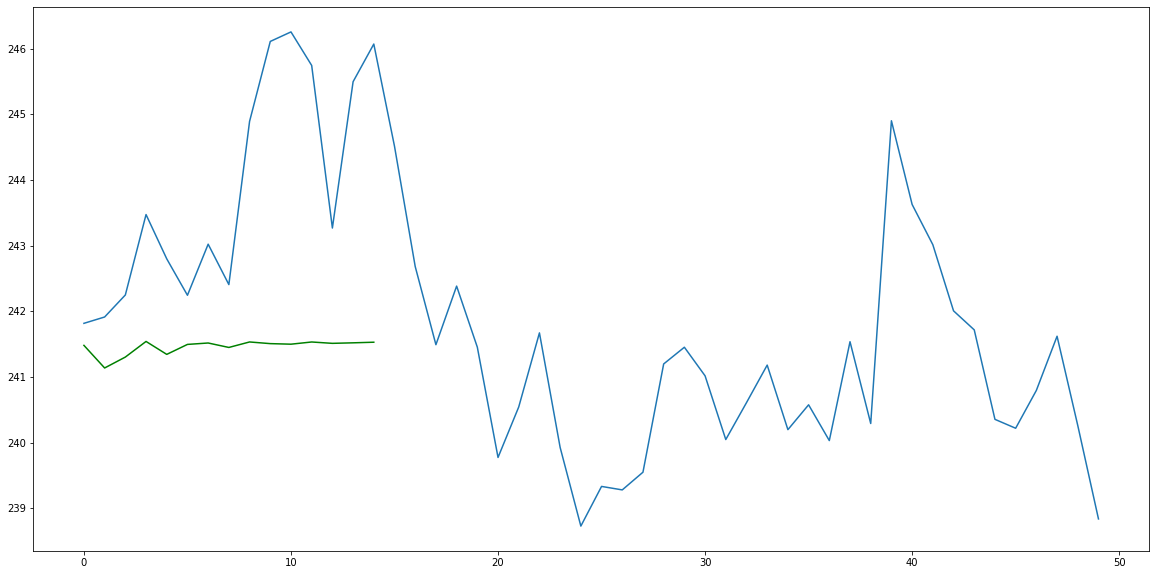

In [59]:
plt.figure(figsize=[20,10])
plt.plot(test_data[320:])
plt.plot(Pred_value,color='g')